In [116]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

df_test = pd.read_spss('data/newdata/مهندسی.sav')
df_test.head()

,ID,Boomi,Sen,Maghtah,Moadel,Doreh,Meliyat,Vaziyattahol,Farzandan,Sal,Komakmali,Jensiyat,Leave,Remove,Tasmim
0,810100001.0,0.0,29.0,PhD,14.86,Rozaneh,Irari,Mojarad,0.0,1400,Bedon-Komak,Mard,No,No,No
1,810100004.0,Boomi,37.0,PhD,16.04,Shabaneh,Irari,Motahel,1.0,1400,Bedon-Komak,Mard,No,No,No
2,810100005.0,0.0,29.0,PhD,14.51,Rozaneh,Irari,Mojarad,0.0,1400,Bedon-Komak,Zan,No,No,No
3,810100006.0,Boomi,31.0,PhD,17.92,Shabaneh,Irari,Motahel,0.0,1400,Bedon-Komak,Mard,No,No,No
4,810100008.0,Boomi,35.0,PhD,17.51,Rozaneh,Irari,Motahel,2.0,1400,Bedon-Komak,Zan,No,No,No


In [163]:
df_test['Sal'].unique()

['1400', '1395', '1396', '1397', '1398', '1399']
Categories (6, object): ['1400', '1395', '1396', '1397', '1398', '1399']

In [117]:
import pandas as pd

# create a sample data frame
df = pd.DataFrame({
    'Column1': ['A', 'B', 'C', 'A'],
    'Column2': ['X', 'Y', 'X', 'Z'],
    'Column3': ['Yes', 'No', 'Yes', 'Yes']
})
print(df)
# create a dictionary to map unique values to numbers
mapping_dict = {}
for col in df.columns:
    unique_values = df[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df.replace(mapping_dict, inplace=True)

print(df)


  Column1 Column2 Column3
0       A       X     Yes
1       B       Y      No
2       C       X     Yes
3       A       Z     Yes
   Column1  Column2  Column3
0        0        0        0
1        1        1        1
2        2        0        0
3        0        2        0


In [118]:
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()

,ID,Boomi,Sen,Maghtah,Moadel,Doreh,Meliyat,Vaziyattahol,Farzandan,Sal,Komakmali,Jensiyat,Leave,Remove,Tasmim
0,810100001.0,0,29.0,0,14.86,0,0,0,0.0,1400,0,0,0,0,0
1,810100004.0,1,37.0,0,16.04,1,0,1,1.0,1400,0,0,0,0,0
2,810100005.0,0,29.0,0,14.51,0,0,0,0.0,1400,0,1,0,0,0
3,810100006.0,1,31.0,0,17.92,1,0,1,0.0,1400,0,0,0,0,0
4,810100008.0,1,35.0,0,17.51,0,0,1,2.0,1400,0,1,0,0,0


In [119]:
print(df_test[df_test['Leave'] == 1].shape)
print(df_test[df_test['Remove'] == 1].shape)
#print(df_test[df_test['Tasmim'] == 1].shape)
print(df_test.shape)

(7, 15)
(6, 15)
(3494, 15)


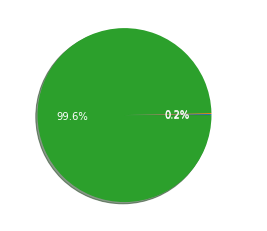

In [120]:
Leave = df_test[df_test['Leave'] == 1].shape[0]
Remove = df_test[df_test['Remove'] == 1].shape[0]
Remained = df_test.shape[0] - Leave - Leave
plt.pie([Leave, Remove, Remained], shadow=True, labels=['Leave ','Remove', 'Rest'], textprops={'color':"w"}, autopct='%1.1f%%');

<AxesSubplot:>

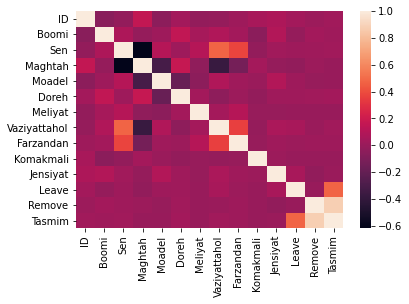

In [142]:
sns.heatmap(df_test.corr(), annot=False)


In [121]:
def dummy_fill(df):
    SL = df['Leave']
    CF = df['Remove']

    if SL == 1:
        return 'Leave'
    if CF == 1:
        return 'Remove'
    else: 
        return '0'       

df_test['newClass'] = df_test.apply(dummy_fill, axis=1)

In [122]:
df_test.head()
print("non zero percentage:", 100*len(df_test[(df_test['newClass'] != '0')]) / len(df_test))

non zero percentage: 0.3720663995420721


In [123]:
df_test.dropna(inplace=True)
df_test.isna().sum()

ID              0
Boomi           0
Sen             0
Maghtah         0
Moadel          0
Doreh           0
Meliyat         0
Vaziyattahol    0
Farzandan       0
Sal             0
Komakmali       0
Jensiyat        0
Leave           0
Remove          0
Tasmim          0
newClass        0
dtype: int64

In [124]:
X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Columns for training: ['ID', 'Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Sal', 'Komakmali', 'Jensiyat']
(2723, 12)
(681, 12)
(2723,)
(681,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.9926578560939795
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       676
       Leave       0.00      0.00      0.00         2
      Remove       0.00      0.00      0.00         3

    accuracy                           0.99       681
   macro avg       0.33      0.33      0.33       681
weighted avg       0.99      0.99      0.99       681



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: F

In [125]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim', 'ID'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Sal', 'Komakmali', 'Jensiyat']
(2723, 11)
(681, 11)
(2723,)
(681,)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       676
       Leave       0.00      0.00      0.00         2
      Remove       0.00      0.00      0.00         3

    accuracy                           0.99       681
   macro avg       0.33      0.33      0.33       681
weighted avg       0.99      0.99      0.99       681

[[673   2   1]
 [  2   0   0]
 [  3   0   0]]


Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Jensiyat', 'Leave', 'Remove']


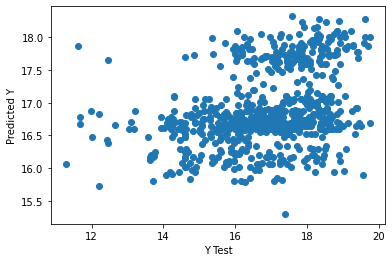

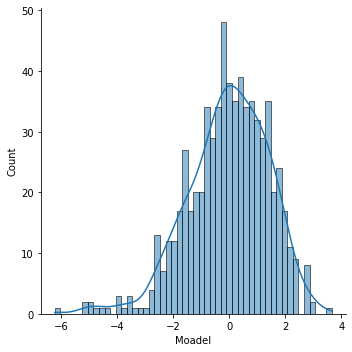

In [135]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Moadel'], axis=1) 
#X = df_test[['Leave', 'Remove']]
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

sns.displot((y_test-predictions),bins=50, kde=True);

In [136]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Boomi,0.140288
Sen,-1.385269
Maghtah,-1.260935
Doreh,-0.536000
Meliyat,-0.767138
Vaziyattahol,-0.023706
Farzandan,0.691198
Komakmali,0.289787
Jensiyat,0.271232
Leave,0.231680


In [137]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.1246044942196982
MSE: 2.0668972105627903
RMSE: 1.4376707587493007


In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, verbose=False)

<AxesSubplot:>

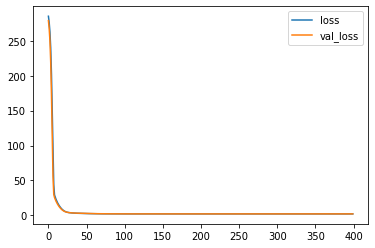

In [139]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Text(0, 0.5, 'Predicted Y')

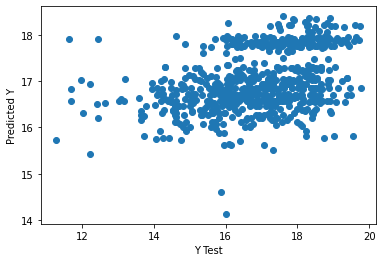

In [140]:
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

#sns.displot((y_test-predictions),bins=50, kde=True);

<AxesSubplot:>

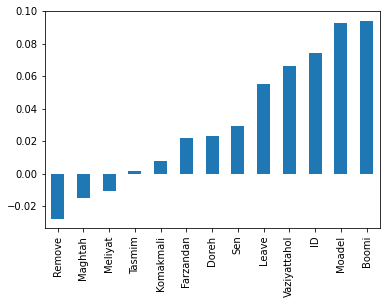

In [152]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

In [155]:
X = df_test.drop(['newClass', 'ID', 'Sal', 'Tasmim','Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Boomi', 'Sen', 'Maghtah', 'Moadel', 'Doreh', 'Meliyat', 'Vaziyattahol', 'Farzandan', 'Komakmali', 'Leave', 'Remove']
(2723, 11)
(681, 11)
(2723,)
(681,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6886930983847284
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       468
           1       0.60      0.01      0.03       213

    accuracy                           0.69       681
   macro avg       0.64      0.50      0.42       681
weighted avg       0.66      0.69      0.57       681

0.6886930983847284
0.7029012118986412


In [159]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
86/86 [==============================] - 1s 3ms/step - loss: 0.6224 - accuracy: 0.6948 - val_loss: 0.6297 - val_accuracy: 0.6872
Epoch 2/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.7022 - val_loss: 0.6235 - val_accuracy: 0.6872
Epoch 3/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7022 - val_loss: 0.6231 - val_accuracy: 0.6872
Epoch 4/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7022 - val_loss: 0.6216 - val_accuracy: 0.6872
Epoch 5/600
86/86 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.7022 - val_loss: 0.6220 - val_accuracy: 0.6872
Epoch 6/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7022 - val_loss: 0.6223 - val_accuracy: 0.6872
Epoch 7/600
86/86 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7022 - val_loss: 0.6217 - val_accuracy: 0.6872
Epoch 8/600
8

<AxesSubplot:>

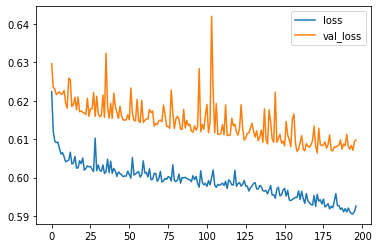

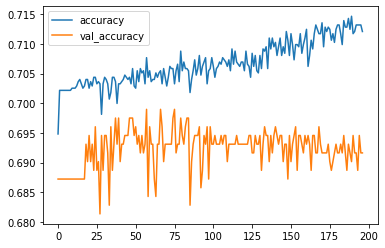

In [160]:
model_loss = pd.DataFrame(model.history.history)
loss = model_loss[['loss', 'val_loss']]
acc = model_loss[['accuracy', 'val_accuracy']]
loss.plot()
acc.plot()

In [161]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       468
           1       0.56      0.07      0.12       213

    accuracy                           0.69       681
   macro avg       0.63      0.52      0.47       681
weighted avg       0.65      0.69      0.60       681

[[456  12]
 [198  15]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  'will be removed after 2021-01-01. '
